In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
wikipedia_df = pd.read_csv('../data/wiki_earthquakes_clean.csv')

In [3]:
#dropping previous index column
wikipedia_df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
#reverting back to datetime
wikipedia_df['origin_utc'] = pd.to_datetime(wikipedia_df['origin_utc'])

In [5]:
#all death columns except 'deaths_total'
wikipedia_df.drop(columns=['pde_shaking_deaths', 'pde_total_deaths', 'utsu_total_deaths', 'em_dat_total_deaths', 'other_source_deaths'], inplace=True)

In [6]:
wikipedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   origin_utc         1340 non-null   datetime64[ns]
 1   country            1339 non-null   object        
 2   lat                1324 non-null   float64       
 3   long               1324 non-null   float64       
 4   depth_km           1249 non-null   float64       
 5   magnitude          1339 non-null   float64       
 6   secondary_effects  373 non-null    object        
 7   death_total        1340 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 83.9+ KB


In [23]:
wikipedia_df['death_total'].describe()

count      1340.000000
mean       2354.444776
std       23400.120342
min           0.000000
25%           2.000000
50%           8.000000
75%          76.500000
max      655237.000000
Name: death_total, dtype: float64

In [24]:
wikipedia_df = wikipedia_df[wikipedia_df['death_total'] > 0]

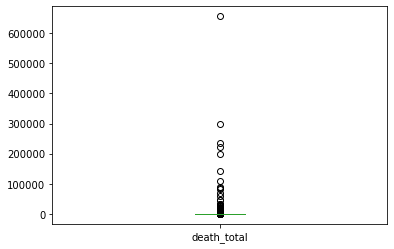

In [81]:
wikipedia_df['death_total'].plot(kind='box');

In [28]:
np.percentile(wikipedia_df['death_total'], 99)

45000.0

In [32]:
#dataframe of death totals within 99 percentile
wiki_99 = wikipedia_df[wikipedia_df['death_total'] < 45000].reset_index()

In [48]:
wiki_99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1256 non-null   int64         
 1   origin_utc         1256 non-null   datetime64[ns]
 2   country            1255 non-null   object        
 3   lat                1244 non-null   float64       
 4   long               1244 non-null   float64       
 5   depth_km           1170 non-null   float64       
 6   magnitude          1256 non-null   float64       
 7   secondary_effects  352 non-null    object        
 8   death_total        1256 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 88.4+ KB


In [34]:
wiki_99.nlargest(columns = 'death_total', n=10)

,index,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
198,230,1939-12-26 23:57:00,Turkey,39.770,39.533,35.0,7.8,NaN,32968.0
65,79,1915-01-13 06:52:00,Italy,42.000,13.500,0.0,6.9,NaN,32610.0
1138,1205,2003-12-26 01:56:00,Iran,28.950,58.268,6.0,6.6,L,31000.0
193,225,1939-01-25 03:32:00,Chile,-36.200,-72.200,0.0,7.7,NaN,30000.0
576,628,1978-09-16 15:35:00,Iran,33.242,57.382,8.2,7.4,NaN,25000.0
774,832,1988-12-07 07:41:00,Armenia,40.919,44.118,6.7,6.7,NaN,25000.0
518,564,1976-02-04 09:01:00,Guatemala,15.296,-89.145,12.3,7.5,T,23000.0
1062,1124,2001-01-26 03:16:00,India,23.402,70.287,23.3,7.6,NaN,20023.0
19,24,1905-04-04 00:50:00,India,33.000,76.000,0.0,7.8,NaN,20000.0
27,33,1906-08-17 00:40:00,Chile,-33.000,-72.000,0.0,8.2,T,20000.0


In [35]:
wiki_99.nsmallest(columns = 'death_total', n=10)

,index,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
2,6,1901-11-15 20:15:00,NewZealand,-43.000,173.000,0.0,6.8,NaN,1.0
3,7,1902-01-30 14:01:00,Japan,40.500,141.300,35.0,6.9,NaN,1.0
45,53,1910-01-08 14:49:00,China,35.000,122.000,0.0,6.8,NaN,1.0
54,63,1912-05-06 19:00:00,Iceland,64.000,-20.000,0.0,7.0,NaN,1.0
71,85,1916-11-14 22:31:00,Taiwan,24.000,121.000,NaN,6.0,NaN,1.0
77,93,1918-04-21 22:32:00,UnitedStates,33.812,-117.440,15.0,6.8,NaN,1.0
149,178,1931-06-07 01:30:00,England,54.080,1.500,NaN,6.1,NaN,1.0
154,183,1931-11-02 10:03:00,Japan,32.003,131.945,42.2,7.5,T,1.0
171,200,1934-01-12 13:31:00,China,23.700,102.700,NaN,6.0,NaN,1.0
188,220,1937-08-20 11:59:00,Philippines,14.318,121.547,35.0,7.3,T,1.0


In [39]:
wiki_99['death_total'].mean()

647.9792993630573

In [40]:
wiki_99['death_total'].std()

2851.5767899904995

In [44]:
wiki_99['death_total'].median()

9.0

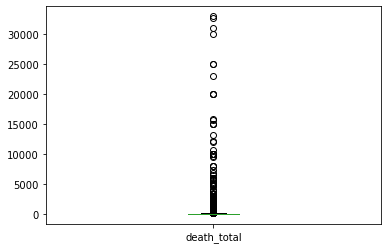

In [46]:
wiki_99['death_total'].plot(kind='box')

In [49]:
#grouping by country and taking a sum of death_total
death_by_country = wiki_99.groupby('country')['death_total'].sum().sort_values(ascending=False)

In [50]:
death_by_country.nlargest(15)

country
Iran          132960.0
China         105356.0
Turkey         78304.0
Chile          58602.0
India          52470.0
Indonesia      46374.0
Italy          43451.0
Japan          42148.0
Armenia        25390.0
Guatemala      25106.0
Ecuador        17331.0
Tajikistan     15357.0
Mexico         14373.0
Morocco        13735.0
Nepal          12418.0
Name: death_total, dtype: float64

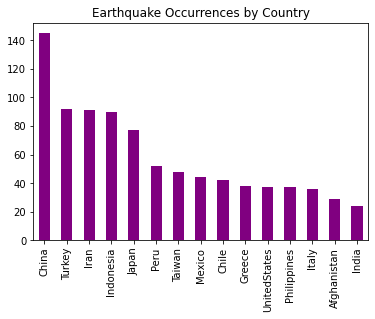

In [80]:
wiki_99['country'].value_counts().nlargest(15).plot(kind='bar', 
                                                    title='Earthquake Occurrences by Country',
                                                   color='purple');

In [82]:
most_common_quakes = wikipedia_df[wikipedia_df['country'].isin(
    ['China', 'Turkey','Iran', 'Indonesia', 'Japan',
     'Peru', 'Taiwan', 'Mexico', 'Chile', 'Greece',
     'UnitedStates', 'Italy', 'Philippines', 'Afghanistan', 'India'])].sort_values('death_total', ascending=False)

most_common_quakes.head()

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
583,1976-07-27 19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237.0
1237,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",297200.0
102,1920-12-16 12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502.0
140,1927-05-22 22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000.0
116,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",143000.0


In [89]:
most_common_quakes_vc = most_common_quakes['country'].value_counts().rename_axis('country').reset_index(name='counts')

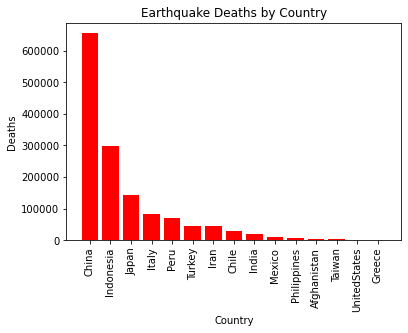

In [97]:
fig, ax = plt.subplots()
ax.bar(most_common_quakes['country'], most_common_quakes['death_total'], color='red')
ax.set_xlabel('Country')
ax.set_ylabel('Deaths')
ax.tick_params(axis='x', labelrotation=90)
plt.title('Earthquake Deaths by Country');

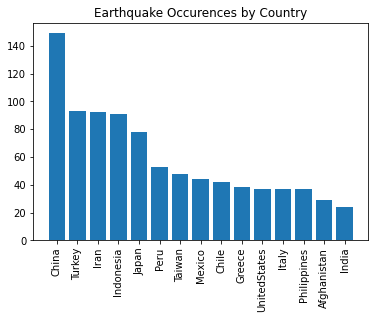

In [99]:
fig, ax = plt.subplots()
ax.bar(most_common_quakes_vc['country'], most_common_quakes_vc['counts'])
ax.tick_params('x', rotation=90)
plt.title('Earthquake Occurences by Country');

In [115]:
fig = px.scatter_mapbox(wiki_99, lat="lat", lon="long", color="magnitude", size="death_total",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20, zoom=0.5,
                  mapbox_style="carto-darkmatter")
fig.show()

In [72]:
china_quakes = wiki_99[wiki_99['country'] == 'China']
china_quakes['death_total'].sort_values(ascending=False)

449     15621.0
503     10000.0
76      10000.0
150     10000.0
396      8064.0
         ...   
460         1.0
197         1.0
832         1.0
955         1.0
1178        1.0
Name: death_total, Length: 145, dtype: float64

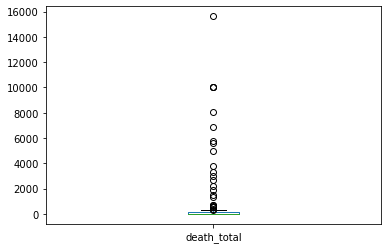

In [74]:
china_quakes['death_total'].plot(kind='box')

Text(0, 0.5, 'Magnitude')

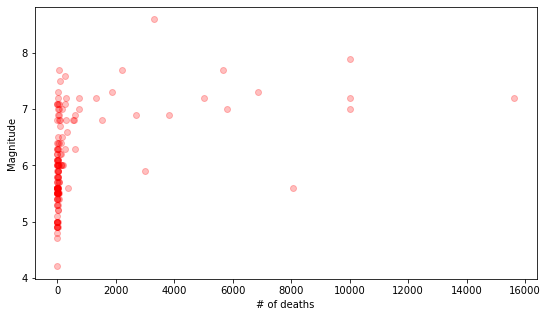

In [70]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(china_quakes['death_total'], china_quakes['magnitude'], 
           color='red', alpha=.25)
ax.set_xlabel('# of deaths')
ax.set_ylabel('Magnitude')

In [61]:
#mean deaths by country
wiki_99.groupby('country')['death_total'].mean().sort_values(ascending=False)

country
Armenia                         12695.00
TajikSovietSocialistRepublic    12000.00
Morocco                          3433.75
Nepal                            3104.50
India                            2186.25
                                  ...   
Slovenia                            1.00
Serbia                              1.00
Vietnam                             1.00
England                             1.00
Martinique                          1.00
Name: death_total, Length: 104, dtype: float64

In [62]:
wiki_99.groupby('country')['magnitude'].mean().sort_values(ascending=False).head(15)

country
Samoa                           8.100000
SolomonIslands                  7.720000
TajikSovietSocialistRepublic    7.600000
Martinique                      7.400000
Chile                           7.390476
PuertoRico                      7.300000
SaintPierreandMiquelon          7.300000
SaudiArabia/Egypt               7.200000
Mexico                          7.100000
Turkmenistan                    7.066667
Kyrgyzstan                      7.025000
Japan                           7.014286
Mozambique                      7.000000
Montenegro                      6.900000
Romania                         6.880000
Name: magnitude, dtype: float64

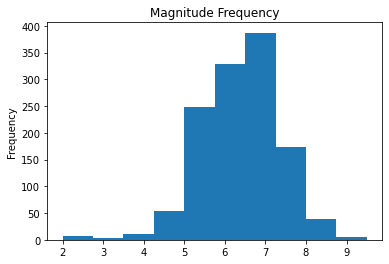

In [63]:
wiki_99['magnitude'].plot(kind='hist', title='Magnitude Frequency');

This appears to follow a normal distribution

In [ ]:
wikipedia_df['hour'] = wikipedia_df['origin_utc'].dt.hour
wikipedia_df['year'] = wikipedia_df['origin_utc'].dt.year

In [ ]:
fig, ax = plt.subplots()
ax.hist(wikipedia_df['hour'])
ax.set_xlabel('Time (hour)')
ax.set_ylabel('# of earthquakes');

In [ ]:
fig, ax = plt.subplots()
ax.bar(wikipedia_df['hour'], wikipedia_df['death_total'])
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Deaths')
;

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(wikipedia_df['year'], wikipedia_df['death_total'], 
           color='red', alpha=.25)
ax.set_xlabel('Time')
ax.set_ylabel('# of deaths', color='red')
ax.tick_params('y', colors='red')
ax2 = ax.twinx()
ax2.scatter(wikipedia_df['year'], wikipedia_df['magnitude'],          
         color='blue', alpha=.25)
ax2.set_ylabel('Magnitude', color='blue');
ax2.tick_params('y', colors='blue')

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(wikipedia_df['year'], wikipedia_df['depth_km'], 
           color='red', alpha=.25)
ax.set_xlabel('Time')
ax.set_ylabel('Depth (Km)', color='red')
ax.tick_params('y', colors='red')
ax2 = ax.twinx()
ax2.scatter(wikipedia_df['year'], wikipedia_df['magnitude'],          
         color='blue', alpha=.25)
ax2.set_ylabel('Magnitude', color='blue');
ax2.tick_params('y', colors='blue')

In [ ]:
deaths_above_mean = wikipedia_df[wikipedia_df['death_total'] > wikipedia_df['death_total'].mean()]
deaths_above_mean['death_total'].nlargest(1)

In [ ]:
#removing high death outliers
outliers = deaths_above_mean[deaths_above_mean['death_total'] > 50000].index
deaths_above_mean.drop(outliers, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(deaths_above_mean['hour'], deaths_above_mean['death_total'])
ax.set_xlabel('hour')
ax.set_ylabel('deaths');

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(deaths_above_mean['year'], deaths_above_mean['death_total'])
ax.set_xlabel('year')
ax.set_ylabel('deaths');

In [ ]:
#hist of magnitude and depth
fig, ax = plt.subplots()
ax.hist(wikipedia_df['magnitude']);

In [ ]:
fig, ax = plt.subplots()
ax.hist(wikipedia_df['depth_km']);

In [ ]:
fig = px.scatter_mapbox(wikipedia_df, lat="lat", lon="long", color="magnitude", size="death_total",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

In [ ]:
wikipedia_df.groupby('year')['death_total'].sum().plot.line(title='Deaths by Year');

In [ ]:
wikipedia_df.groupby('magnitude')['death_total'].mean().plot.line(title='Average Deaths by Magnitude', color='green');